In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from LinReg import LinReg as LR

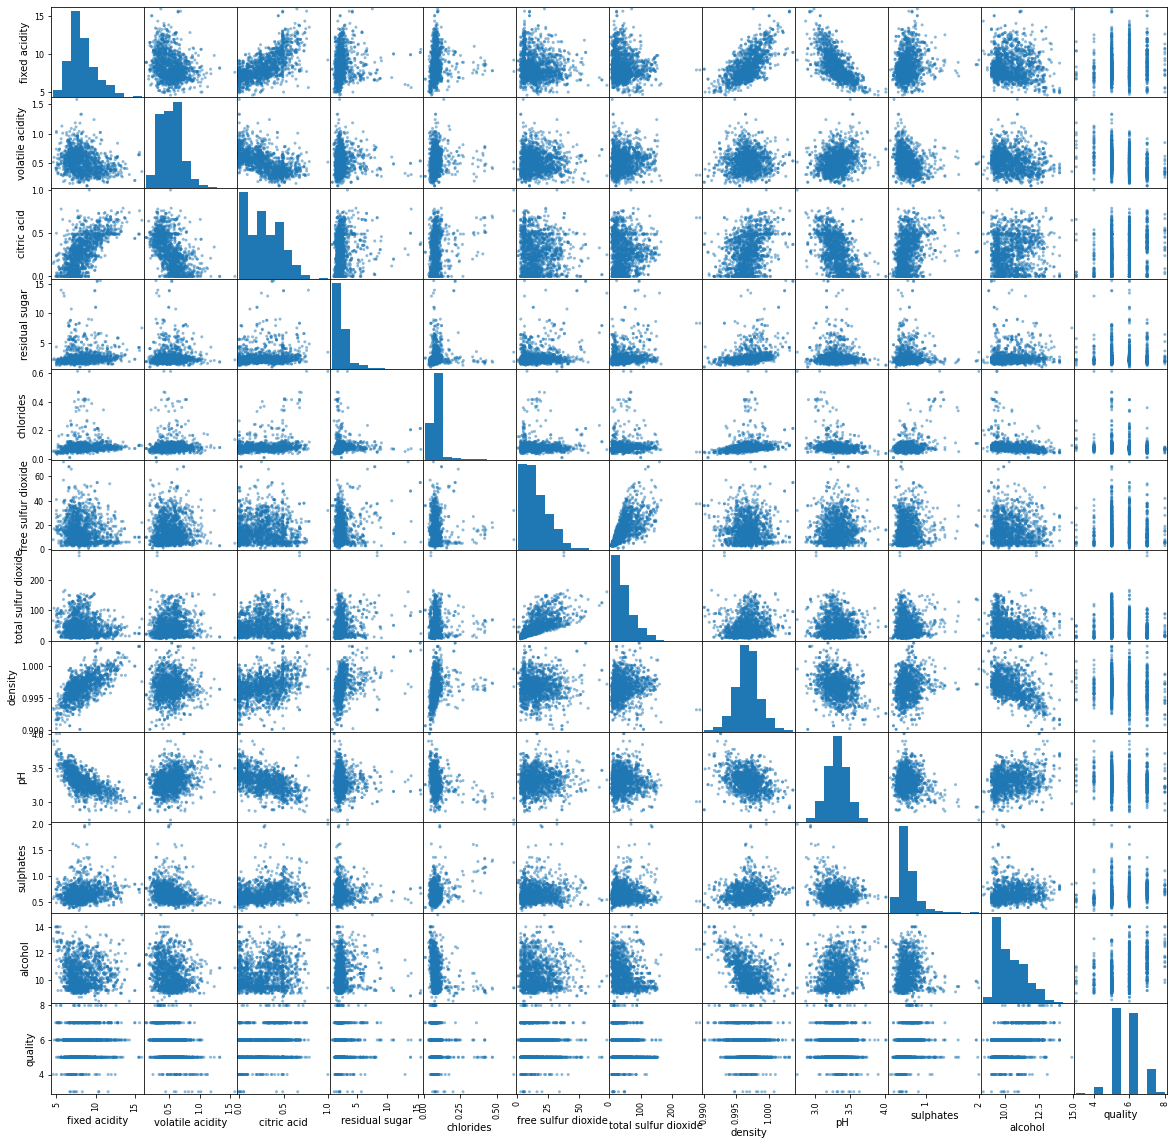

In [2]:
df = pd.read_csv("./winequality-red.csv")
plot = pd.plotting.scatter_matrix(df, figsize=(20, 20))

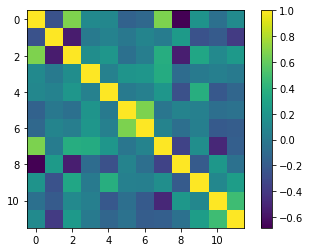

In [3]:
plt.imshow(df.corr())
plt.colorbar()

In [4]:
corr = df.corr()
corr[["citric acid", "density"]][0:1]

,citric acid,density
fixed acidity,0.671703,0.668047


In [5]:
_df = df[["citric acid", "density", "fixed acidity"]]
_df.head()

,citric acid,density,fixed acidity
0,0.00,0.9978,7.4
1,0.00,0.9968,7.8
2,0.04,0.9970,7.8
3,0.56,0.9980,11.2
4,0.00,0.9978,7.4


In [6]:
_df = (_df - _df.min())/(_df.max() - _df.min())
_df.head()

,citric acid,density,fixed acidity
0,0.00,0.567548,0.247788
1,0.00,0.494126,0.283186
2,0.04,0.508811,0.283186
3,0.56,0.582232,0.584071
4,0.00,0.567548,0.247788


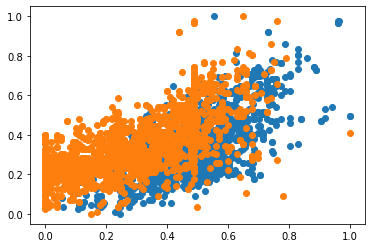

In [7]:
plt.scatter(_df["density"], _df["fixed acidity"])
plt.scatter(_df["citric acid"], _df["fixed acidity"])

In [8]:
train = _df.sample(frac=0.7, random_state=1)
test = _df.drop(train.index)

In [9]:
train.head()

,citric acid,density,fixed acidity
75,0.64,0.626285,0.371681
1283,0.28,0.533774,0.362832
408,0.58,0.508811,0.513274
1281,0.20,0.406021,0.221239
1118,0.12,0.179883,0.221239


In [10]:
test.head()

,citric acid,density,fixed acidity
4,0.00,0.567548,0.247788
7,0.00,0.332599,0.238938
15,0.19,0.626285,0.380531
20,0.48,0.494126,0.380531
21,0.31,0.596916,0.265487


# Linear Regression

We have input matrix $X$, output matrix as $Y$, and our goal is to find a line which minimises the cost function $J$.

## Linear equation
$$\hat Y = X\cdot W + B$$

This is the equation of hyper-plane. We have the parameters $W$ and $B$, which we need to tune to minimize cost function $J$.

## Cost function
We define the cost function $J$ as mean of squared errors:

$$J = \sum\cfrac{\left( Y - \hat Y \right)^2}{2\cdot n}$$

$n$ = number of data instances<br>
$\hat Y$ = predicted output ($\hat Y = X\cdot W + B$)<br>
$Y$ = actual output given in dataset

In matrix form, we get:

$$J = \cfrac{1}{2n}\left( Y - \hat Y \right)^T\cdot\left( Y - \hat Y \right)$$

## How to minimize $J$? (Gradient Descent)
We apply minima-maxima to change $W$ -- weights and $B$ -- biases

$$\cfrac{dJ}{dW} = \cfrac1n \left(Y - \hat Y\right) \cdot X^T$$

$$\cfrac{dJ}{dB} = \cfrac1n \left(Y - \hat Y\right)^T \cdot \mathbf{\vec1}$$

$\mathbf{\vec1}$ is column matrix filled with 1.

$\therefore$ we update $W$ and $B$ by following rule:

$$W^{t + 1} = W^t - \cfrac{dJ}{dW}$$
$$B^{t + 1} = B^t - \cfrac{dJ}{dB}$$

In [11]:
model = LR.Model(0.001, 2000)

In [12]:
X = _df[["citric acid", "density"]].values
Y = np.array([_df["fixed acidity"].values]).T

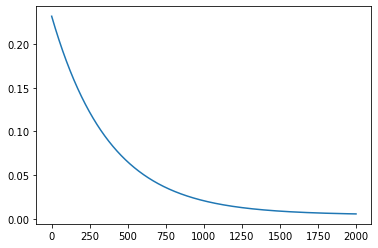

In [15]:
H = model.train(X, Y)

In [17]:
abs(Y - H).mean()

0.08118273419677045